In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import re

### Ejercicio

* Bajar el conjunto de documentos de kaggle https://www.kaggle.com/uciml/sms-spam-collection-dataset  o de
https://drive.google.com/file/d/1HUXG6b7U3_taJw0-Aj6bkl39gdk6h5AK/view?usp=sharing

* Cargarlo el data set

* Construir la matriz tf, tf_idf, y trigramas por palabras

* Seleccionar cinco tweets y clasificarlos con los 5 vecinos más cercanos usando tf_idf con similitud coseno


In [3]:
# Cargamos el dataset como un dataframe de pandas
dataset_df = pd.read_csv("../Files/spam.csv", usecols=[0, 1])
dataset_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset_df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [5]:
print("% clase 'ham' :", round(dataset_df['v1'].value_counts()[0]/dataset_df.count()[0]*100, 1))
print("% clase 'spam':", round(dataset_df['v1'].value_counts()[1]/dataset_df.count()[0]*100, 1))

% clase 'ham' : 86.6
% clase 'spam': 13.4


### normalize_corpus

In [6]:
stop_words = nltk.corpus.stopwords.words('english')

def tekenize_corpus(text):
    text = text.lower()
    text = re.sub(r'[\.,\-?+*_]', '', text)
    text_tokens = word_tokenize(text)
    text_tokens = [token for token in text_tokens if token not in stop_words]
    text_tokens = [token for token in text_tokens if len(token) > 2]
    
    return ' '.join(text_tokens)
    # return text_tokens

In [7]:
tekenize_corpus('Hello, from my beautiful* word')

'hello beautiful word'

In [8]:
tokenized_corpus = dataset_df.v2.apply(tekenize_corpus)
tokenized_corpus

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts 21st m...
3                           dun say early hor already say
4              nah n't think goes usf lives around though
                              ...                        
5567    2nd time tried contact �750 pound prize claim ...
5568                                 going esplanade home
5569                          pity mood soany suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

### Estos datos se usarran para test

In [9]:
test_vectors = dataset_df.loc[[1,2,3,5567]]
test_vectors

,v1,v2
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
5567,spam,This is the 2nd time we have tried 2 contact u...


### Bag of words - term frecuency

In [10]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(tokenized_corpus)

print(cv_matrix.shape)
print(cv_matrix.toarray())

(5572, 8884)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
d0 = cosine_similarity(cv_matrix[5566], cv_matrix[0]).flatten()[0]
d1 = cosine_similarity(cv_matrix[5566], cv_matrix[1]).flatten()[0]
d2 = cosine_similarity(cv_matrix[5566], cv_matrix[2]).flatten()[0]
d3 = cosine_similarity(cv_matrix[5566], cv_matrix[5566]).flatten()[0]

(d0, d1, d2, d3)

(0.0700140042014005, 0.0, 0.10114434748483472, 1.0)

### term frercuency - document frecuency

In [12]:
tt = TfidfVectorizer(min_df=0., max_df=1., use_idf=True, sublinear_tf=True)
tt_matrix = tt.fit_transform(tokenized_corpus)

print(tt_matrix.shape)
print(tt_matrix.toarray())

(5572, 8884)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
d0 = cosine_similarity(tt_matrix[2], tt_matrix[0]).flatten()[0]
d1 = cosine_similarity(tt_matrix[2], tt_matrix[1]).flatten()[0]
d2 = cosine_similarity(tt_matrix[2], tt_matrix[2]).flatten()[0]
d3 = cosine_similarity(tt_matrix[2], tt_matrix[5566]).flatten()[0]

(d0, d1, d2, d3)

(0.0, 0.0, 1.0, 0.04861718555688606)

### Trigrams

In [14]:
cv = CountVectorizer(ngram_range=(2,2), analyzer='word')
cv_matrix = cv.fit_transform(tokenized_corpus)

print(cv_matrix.shape)
print(cv_matrix.toarray())

(5572, 29548)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
d0 = cosine_similarity(tt_matrix[0], tt_matrix[0]).flatten()[0]
d1 = cosine_similarity(tt_matrix[0], tt_matrix[1]).flatten()[0]
d2 = cosine_similarity(tt_matrix[0], tt_matrix[2]).flatten()[0]
d3 = cosine_similarity(tt_matrix[0], tt_matrix[5566]).flatten()[0]

(d0, d1, d2, d3)

(1.0000000000000002, 0.0, 0.0, 0.04120724489714643)

## Clound words

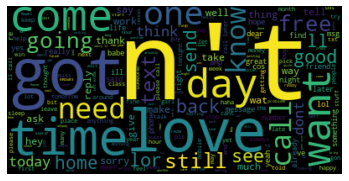

In [16]:
from wordcloud import WordCloud

text = ' '.join(tokenized_corpus)

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Plot common words

In [17]:
words, counts = np.unique(text.split(), return_counts=True)
df = pd.DataFrame({'counts': counts}, index=words)
df = df.sort_values(by='counts', ascending=False)
df.head()

,counts
call,575
get,386
n't,362
free,278
know,258


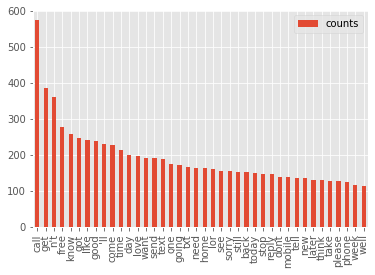

In [18]:
plt.style.use('ggplot')
df.head(40).plot(kind='bar')